In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models,layers

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train/255.0
x_test = x_test/255.0

In [4]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print(x_train[0,:,:,:])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [5]:
print(x_train.shape, np.max(x_train))
print(x_test.shape, np.max(x_test))
print(y_test[:5])


(60000, 28, 28, 1) 1.0
(10000, 28, 28, 1) 1.0
[7 2 1 0 4]


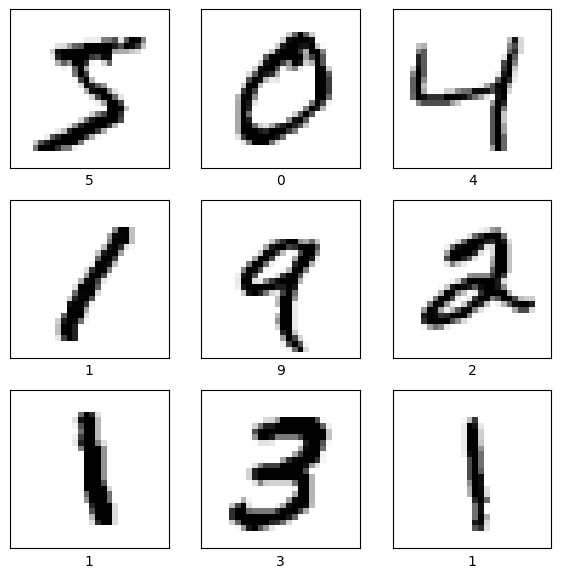

In [6]:
plt.figure(figsize=(7,7))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()


In [7]:
from tensorflow.keras.callbacks import EarlyStopping
number_detector = models.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10,activation="softmax")

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
number_detector.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
number_detector.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
number_detector.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.1,callbacks=[early_stop])

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - accuracy: 0.8686 - loss: 0.4038 - val_accuracy: 0.9838 - val_loss: 0.0491
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9813 - loss: 0.0626 - val_accuracy: 0.9887 - val_loss: 0.0397
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.9873 - loss: 0.0408 - val_accuracy: 0.9895 - val_loss: 0.0333
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9911 - loss: 0.0311 - val_accuracy: 0.9923 - val_loss: 0.0310
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9924 - loss: 0.0255 - val_accuracy: 0.9912 - val_loss: 0.0398


In [10]:
test_loss,test_acc = number_detector.evaluate(x_test,y_test)
print("Accuracy: ",test_acc)
print("Loss: ",test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9902 - loss: 0.0354
Accuracy:  0.9918000102043152
Loss:  0.030822893604636192


In [11]:
from sklearn.metrics import accuracy_score
pred_y = number_detector.predict(x_test)
predictions = np.argmax(pred_y,axis=1)
accuracys = accuracy_score(predictions,y_test)
print(accuracys)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
0.9918


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


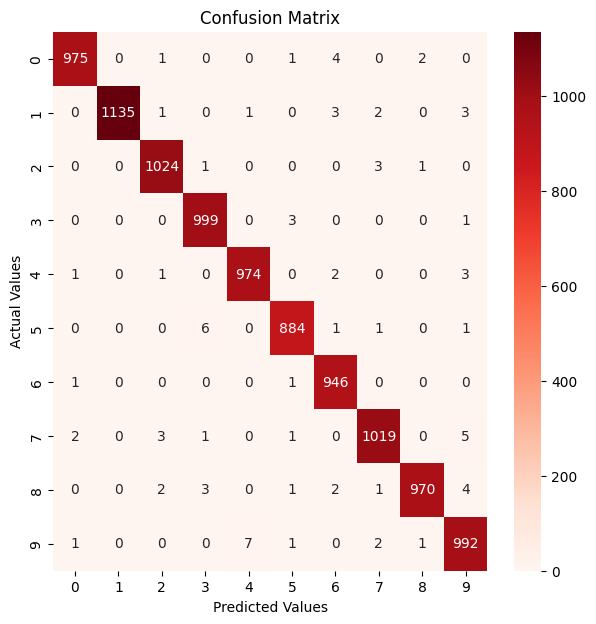

Accuracy:  0.9918
Precision:  0.9918229642551769
Recall:  0.9918
F1:  0.991802108997331
Classification Report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       1.00      0.99      1.00      1145
           2       0.99      1.00      0.99      1029
           3       0.99      1.00      0.99      1003
           4       0.99      0.99      0.99       981
           5       0.99      0.99      0.99       893
           6       0.99      1.00      0.99       948
           7       0.99      0.99      0.99      1031
           8       1.00      0.99      0.99       983
           9       0.98      0.99      0.99      1004

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [12]:
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,confusion_matrix

pred_y = number_detector.predict(x_test)
predictions = np.argmax(pred_y,axis=1)

accuracy = accuracy_score(predictions,y_test)
precision = precision_score(predictions,y_test,average="weighted")
recall = recall_score(predictions,y_test,average="weighted")
f1 = f1_score(predictions,y_test,average="weighted")
confusion_mat = confusion_matrix(predictions,y_test)
class_report = classification_report(predictions,y_test)

plt.figure(figsize=(7,7))
sns.heatmap(confusion_mat,cmap="Reds",fmt="d",annot=True,xticklabels=range(10),yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ",f1)
print("Classification Report: ",class_report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


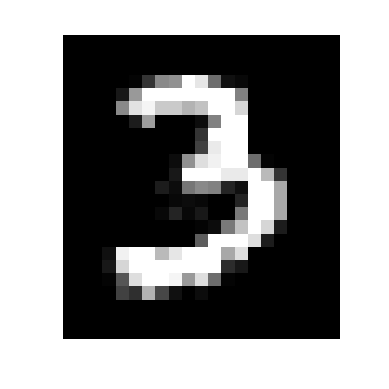



Prediction:  [3]


In [14]:
from tensorflow.keras.preprocessing import image

input_img = image.load_img("test2_image.png",target_size=(28,28),color_mode="grayscale")
img_arr = image.img_to_array(input_img)
img_arr = img_arr/255.0
img_arr = np.expand_dims(img_arr,axis=0)
pred_img = number_detector.predict(img_arr)
final_predict = np.argmax(pred_img,axis=1)

plt.imshow(img_arr.squeeze(),cmap="grey")
plt.axis("off")
plt.show()
print("\n")
print("Prediction: ",final_predict)

In [18]:
'''number_detector.save("digit_model.keras")

   from google.colab import files
   files.download("digit_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
'''from tensorflow.keras.models import load_model
   model = load_model("digit_model.keras")